<a href="https://colab.research.google.com/github/fjadidi2001/fake_news_detection/blob/main/fake_news4thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ All libraries imported and seeds set for reproducibility!
Mounted at /content/drive
Dataset shape: (2282, 13)
Columns: ['account_id', 'post_id', 'Category', 'Page', 'Post URL', 'Date Published', 'Post Type', 'Rating', 'Debate', 'share_count', 'reaction_count', 'comment_count', 'Context Post']
First 5 rows:
     account_id       post_id    Category      Page  \
0  6.231759e+10  1.020000e+16  mainstream  Politico   
1  6.231759e+10  1.020000e+16  mainstream  Politico   
2  6.231759e+10  1.020000e+16  mainstream  Politico   
3  6.231759e+10  1.020000e+16  mainstream  Politico   
4  6.231759e+10  1.020000e+16  mainstream  Politico   

                                            Post URL Date Published Post Type  \
0  https://www.facebook.com/politico/posts/101538...      9/19/2016      link   
1  https://www.facebook.com/politico/posts/101538...      9/19/2016      link   
2  https://www.facebook.com/politico/posts/101538...      9/19/2016      link   
3  https://www.facebook.com/politic

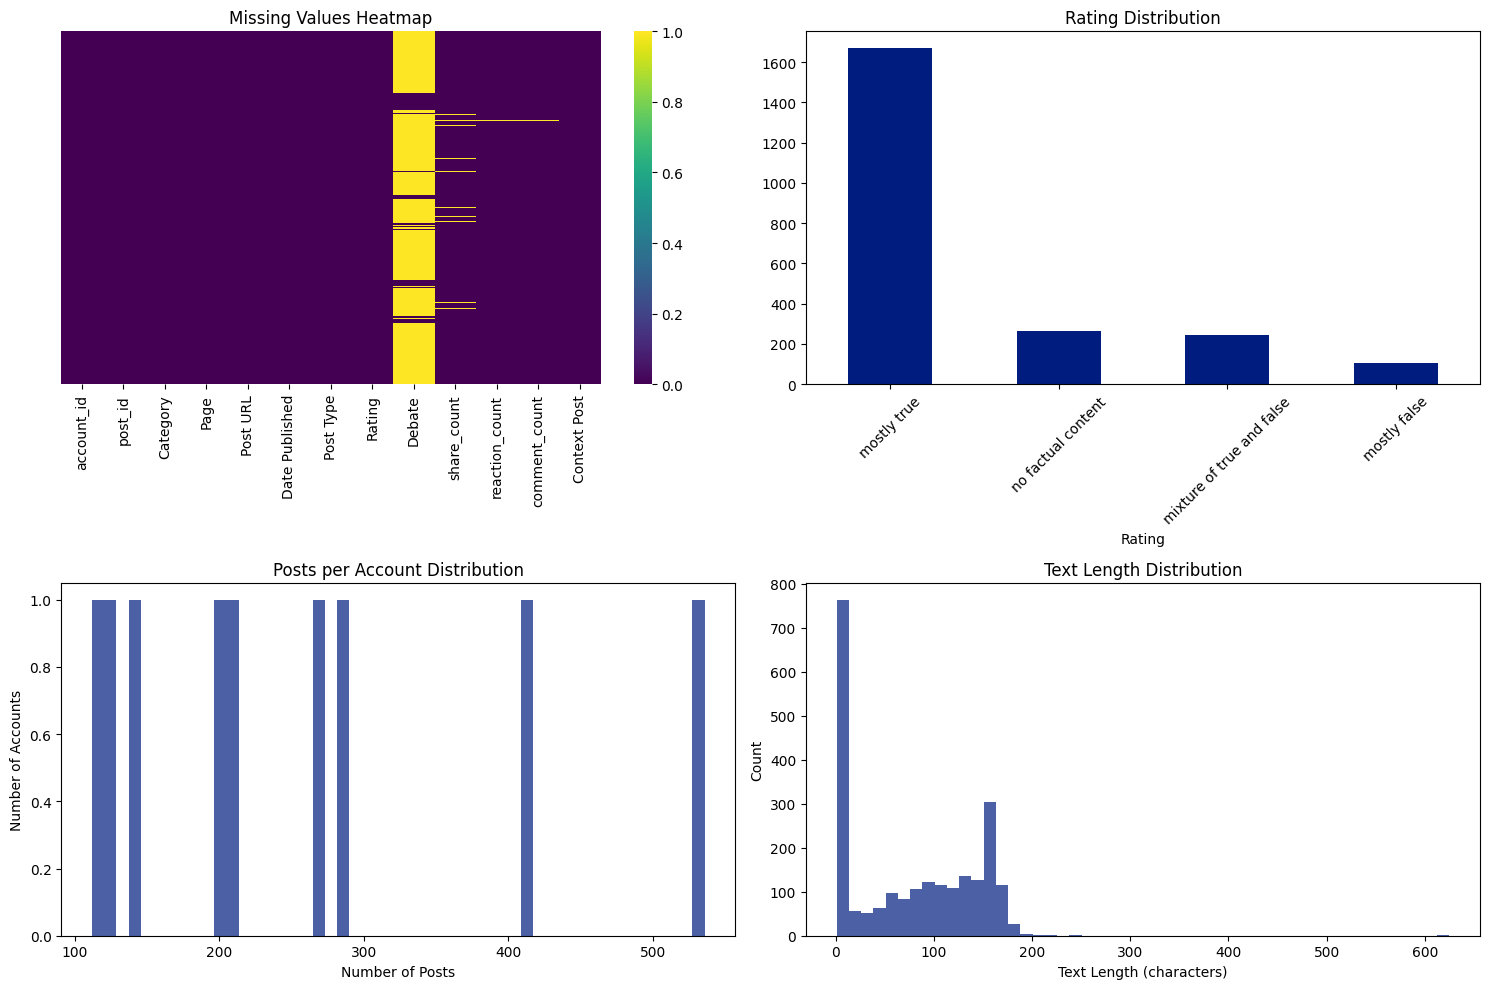

✅ Network features preprocessed
Raw features shape: (2282, 3)
Processed features shape: (2282, 3)
Standardized features shape: (2282, 3)
NaN check: False


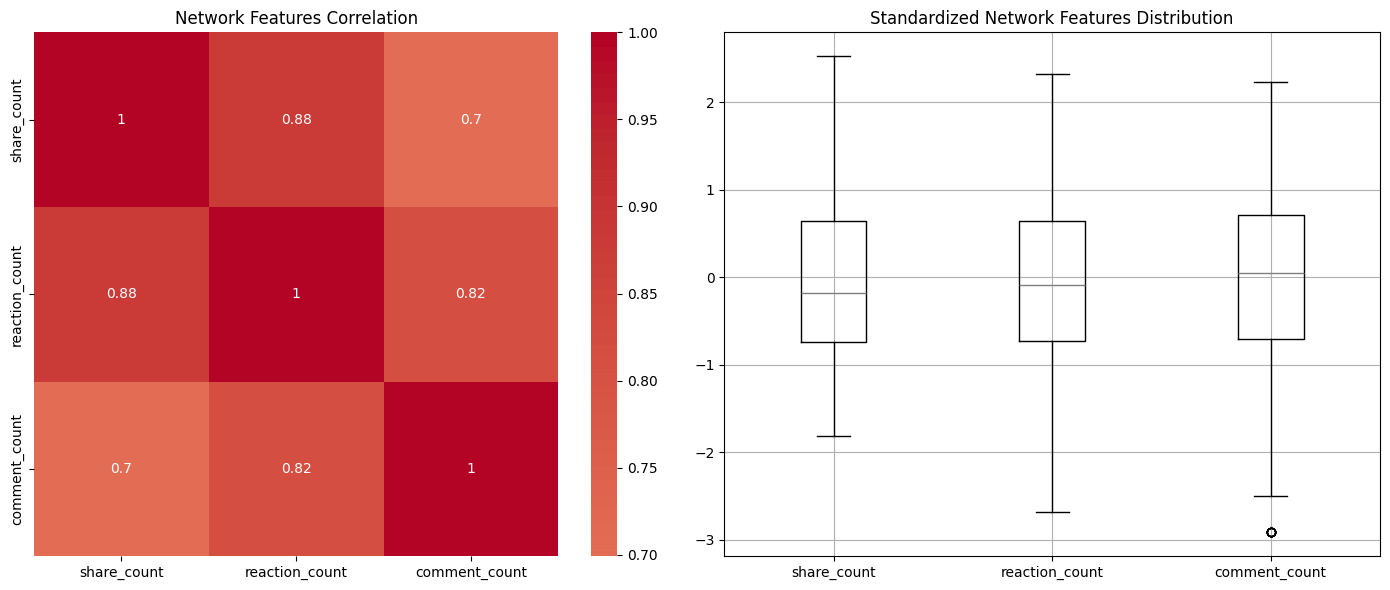

Label distribution: [1669  613]
Class 0 (mostly true): 1669 (73.1%)
Class 1 (others): 613 (26.9%)


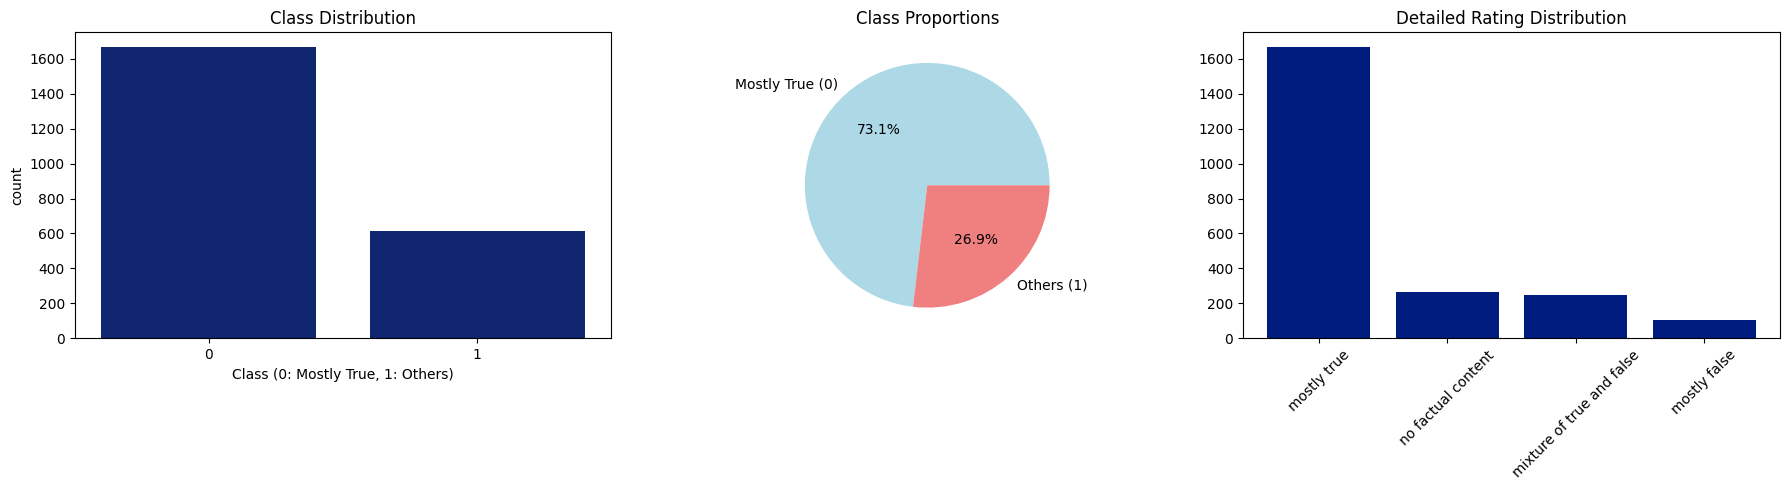


🔄 Constructing graph with similarity method...
Nodes: 2282, Edges: 7006
Average degree: 6.14
Degree std: 1.16

🔄 Constructing graph with account method...
Nodes: 2282, Edges: 90
Average degree: 0.08
Degree std: 0.56

🔄 Constructing graph with hybrid method...
Nodes: 2282, Edges: 4319
Average degree: 3.79
Degree std: 0.95

✅ Final graph selected: 2282 nodes, 4319 edges


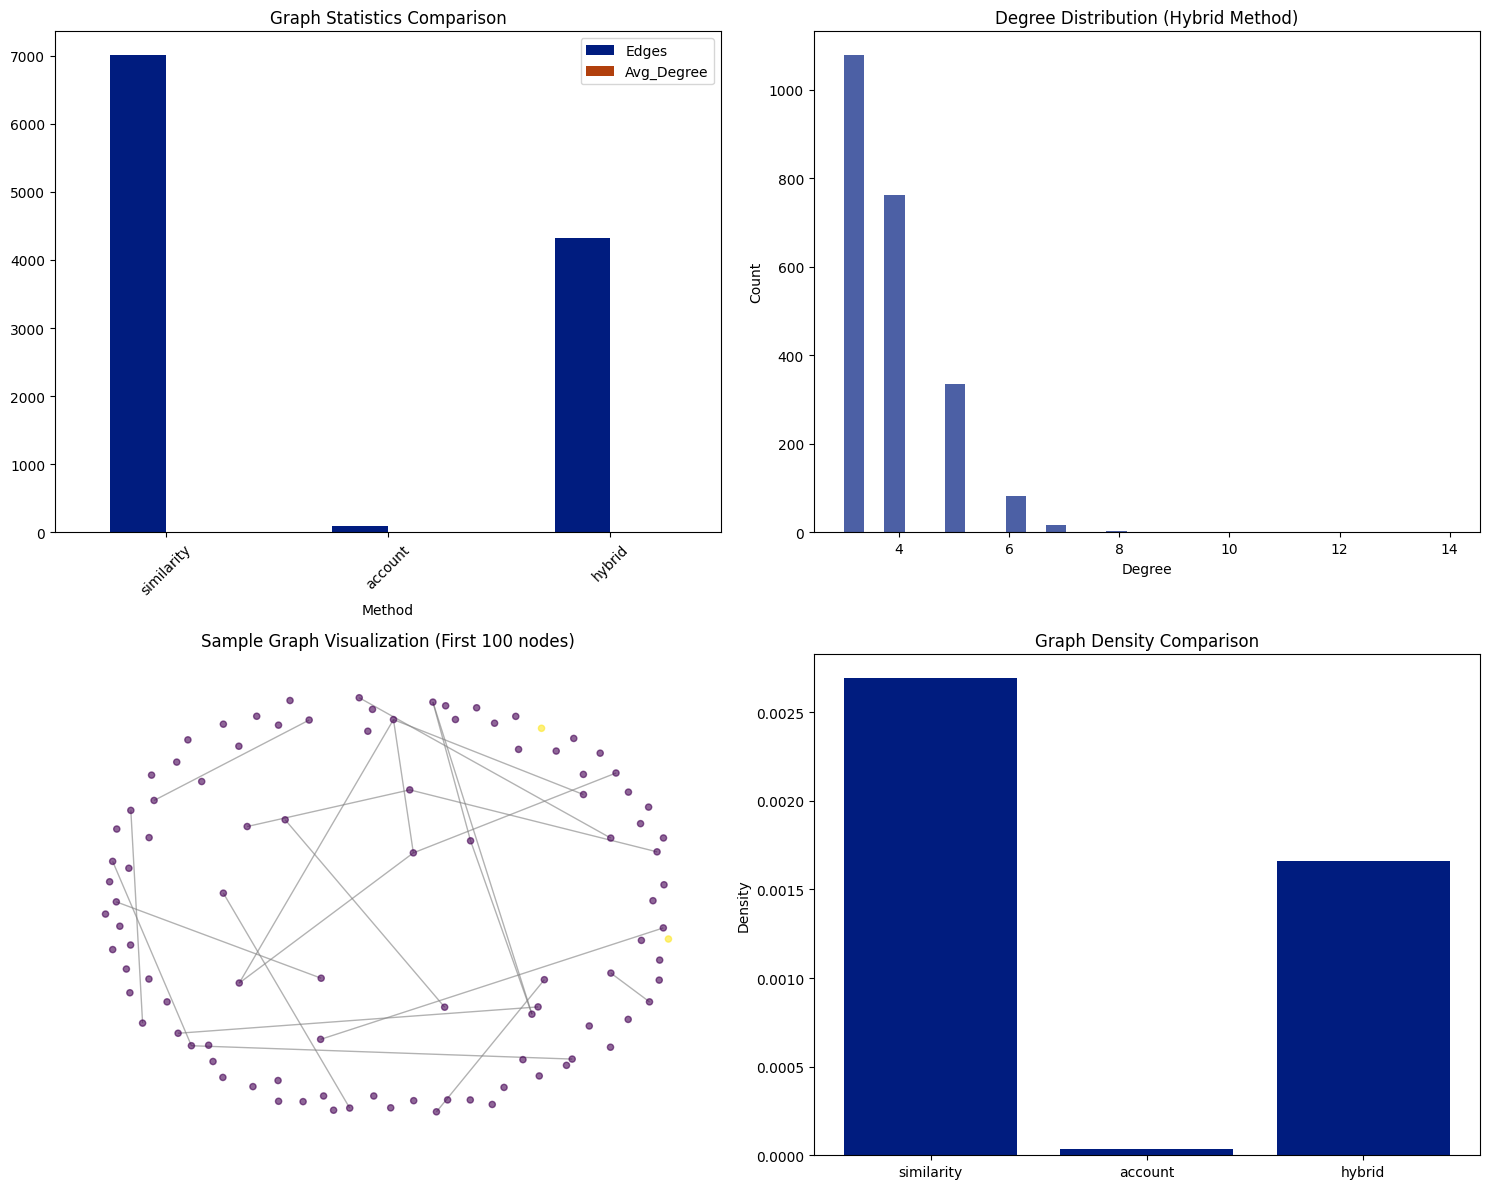

PyTorch Geometric Data: Data(x=[2282, 3], edge_index=[2, 6601])
Using device: cuda
GCN embeddings shape: torch.Size([2282, 128])
NaN check: False


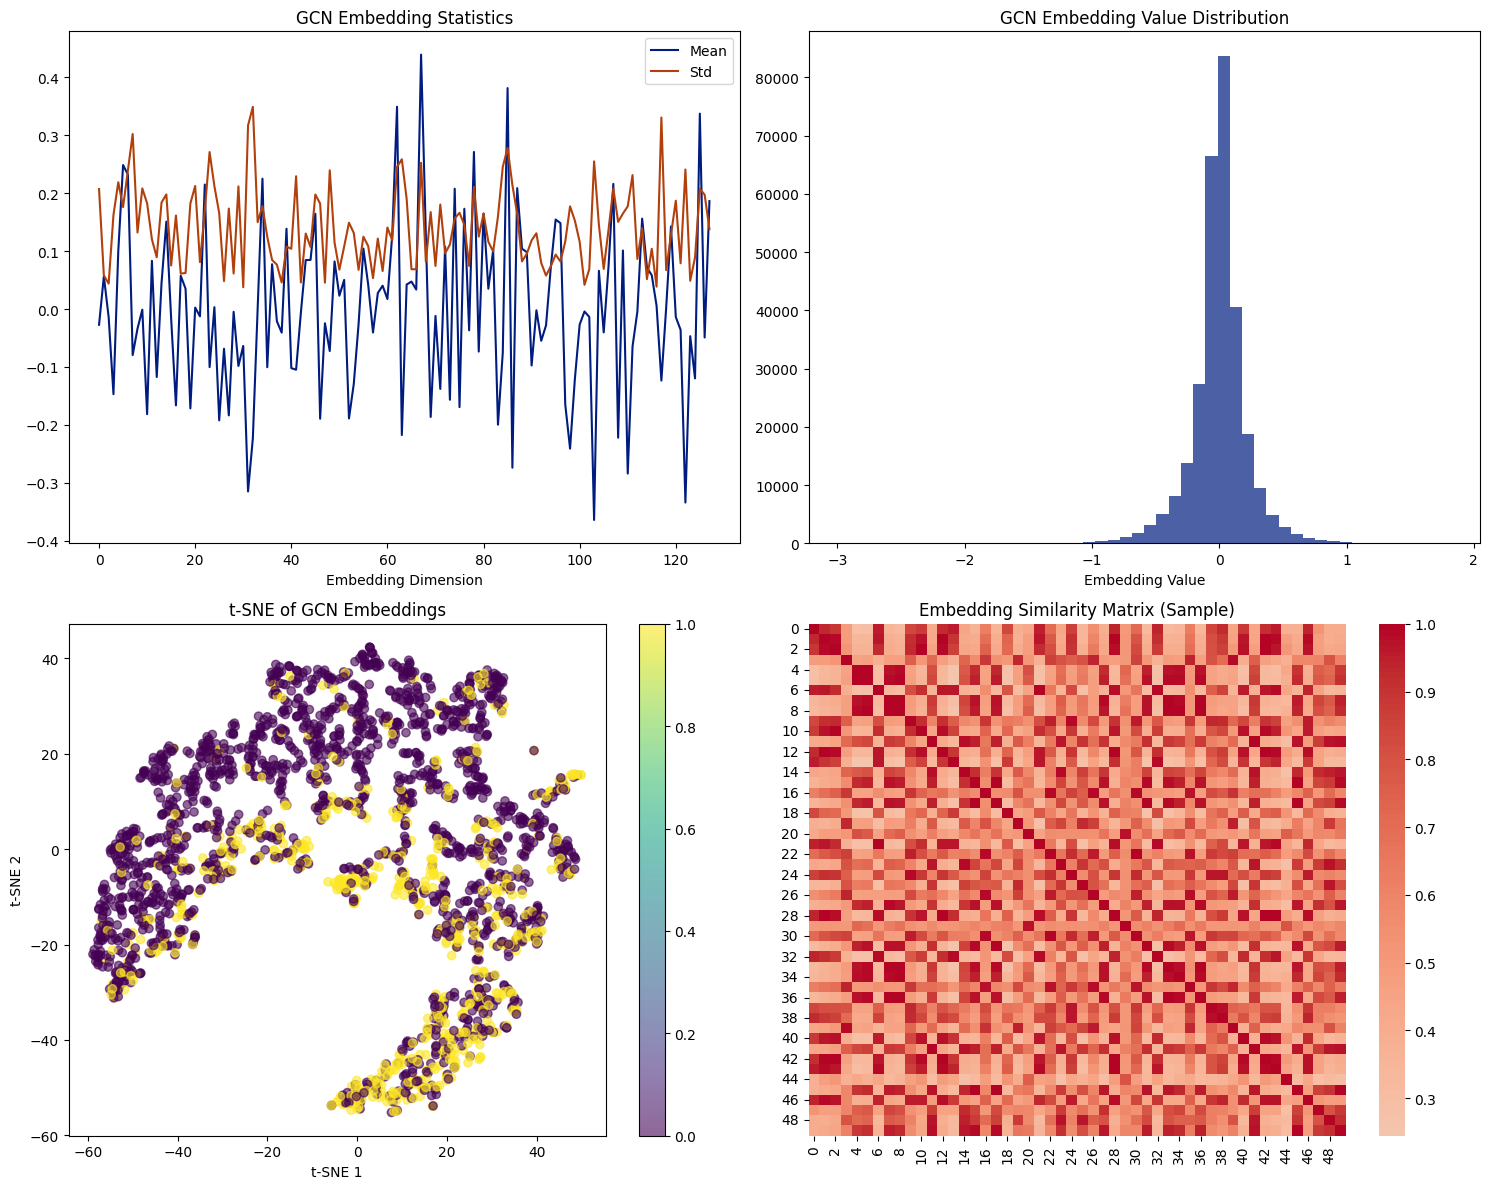

✅ GCN model and embeddings saved


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Processing 2282 texts...
Optimal max_length: 45
Processed 160 texts...
Processed 320 texts...
Processed 480 texts...
Processed 640 texts...
Processed 800 texts...
Processed 960 texts...
Processed 1120 texts...
Processed 1280 texts...
Processed 1440 texts...
Processed 1600 texts...
Processed 1760 texts...
Processed 1920 texts...
Processed 2080 texts...
Processed 2240 texts...
BERT embeddings shape: torch.Size([2282, 768])
NaN check: False


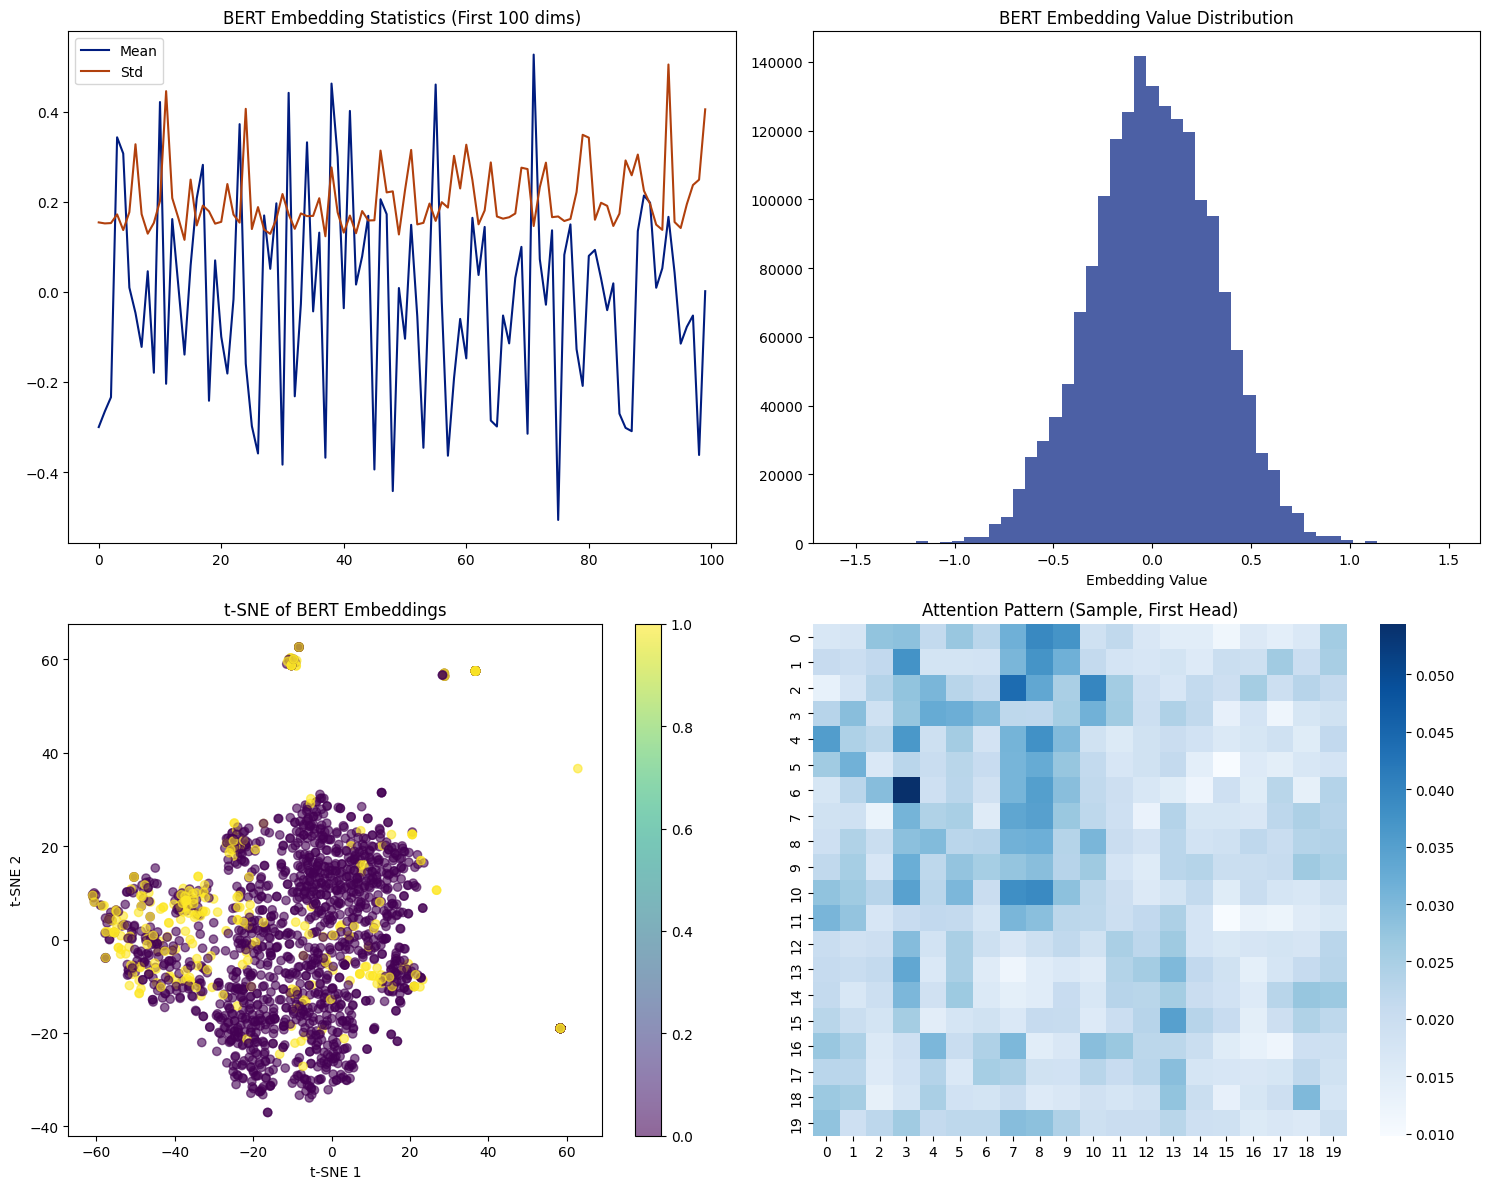

✅ BERT embeddings saved
Model parameters: 298,188
Original class distribution: [1669  613]
After SMOTE - class distribution: [1669 1669]
Resampled GCN shape: torch.Size([3338, 128])
Resampled BERT shape: torch.Size([3338, 768])
Training set size: 2670
Test set size: 668


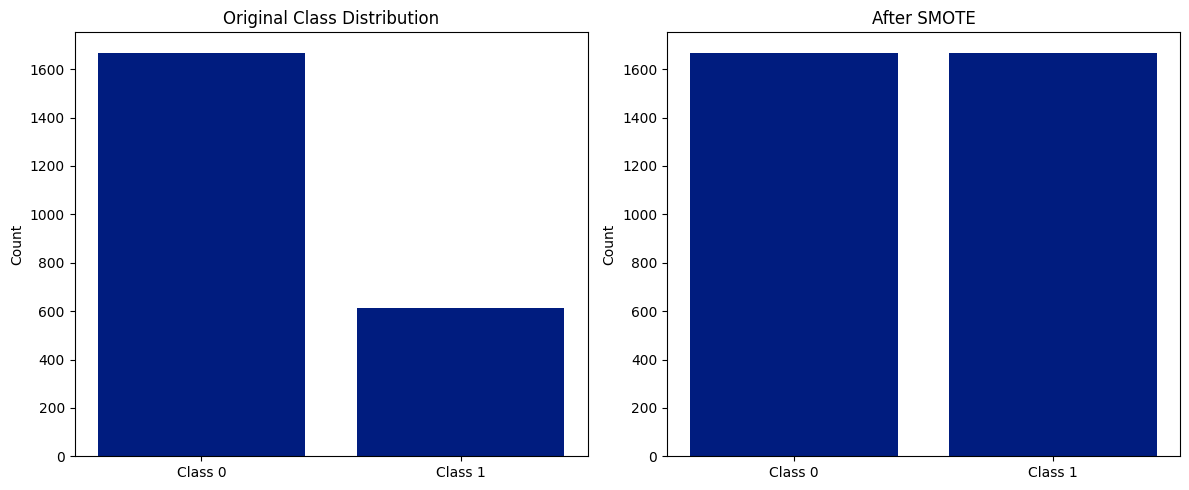

🚀 Starting model training...
Epoch [5/50]
  Train Loss: 0.4283, Val Loss: 0.4464
  Train Acc: 79.89%, Val Acc: 79.34%
  Social Acc: 33.48%, Text Acc: 24.79%
  LR: 0.001000
  Attention weights (avg): Social=0.358, Text=0.642
Epoch [10/50]
  Train Loss: 0.3862, Val Loss: 0.4214
  Train Acc: 82.77%, Val Acc: 79.79%
  Social Acc: 31.35%, Text Acc: 25.99%
  LR: 0.001000
  Attention weights (avg): Social=0.366, Text=0.634
Epoch [15/50]
  Train Loss: 0.3582, Val Loss: 0.4127
  Train Acc: 84.23%, Val Acc: 80.99%
  Social Acc: 29.51%, Text Acc: 24.87%
  LR: 0.000500
  Attention weights (avg): Social=0.344, Text=0.656
Epoch [20/50]
  Train Loss: 0.3556, Val Loss: 0.4483
  Train Acc: 85.21%, Val Acc: 81.44%
  Social Acc: 30.52%, Text Acc: 24.68%
  LR: 0.000500
  Attention weights (avg): Social=0.327, Text=0.673
Epoch [25/50]
  Train Loss: 0.2943, Val Loss: 0.4758
  Train Acc: 87.27%, Val Acc: 81.74%
  Social Acc: 31.31%, Text Acc: 23.15%
  LR: 0.000250
  Attention weights (avg): Social=0.306, Tex

In [2]:
# ==========================================
# STEP 1: SETUP AND IMPORTS & DETERMINISTIC SETUP
# ==========================================
import os # For deterministic setup
# Install dependencies
!pip install torch-geometric imbalanced-learn -q

import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from scipy import io as sio
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from torch_geometric.utils import add_self_loops
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer, BertModel
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
sns.set_palette("dark")

# ==========================================
# COMPREHENSIVE REPRODUCIBILITY SETUP
# ==========================================

def set_all_seeds(seed=42):
    """Set all possible seeds for reproducibility"""
    # Python random
    import random
    random.seed(seed)

    # Numpy
    np.random.seed(seed)

    # PyTorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    # PyTorch backends
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    # Environment variables for additional determinism
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

    # Additional PyTorch settings
    torch.use_deterministic_algorithms(True, warn_only=True)

# Apply comprehensive seed setting
set_all_seeds(42)

print("✅ All libraries imported and seeds set for reproducibility!")

# ==========================================
# STEP 2: DATA LOADING AND INITIAL EXPLORATION
# ==========================================
# Mount Google Drive
drive.mount('/content/drive')
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Projects/Hayat/facebook-fact-check.csv', encoding='latin-1')
# IMPORTANT: Sort dataframe to ensure consistent ordering (from Part 2)
df = df.sort_values(['account_id', 'post_id']).reset_index(drop=True)

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"First 5 rows:")
print(df.head())
# Basic statistics
print(f"\nDataset Info:")
print(f"Number of samples: {len(df)}")
print(f"Number of features: {df.shape[1]}")
print(f"Missing values per column:")
print(df.isnull().sum())
# Visualize dataset overview
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# 1. Missing values heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=axes[0,0])
axes[0,0].set_title('Missing Values Heatmap')
# 2. Rating distribution
df['Rating'].value_counts().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Rating Distribution')
axes[0,1].tick_params(axis='x', rotation=45)
# 3. Account activity distribution
account_counts = df['account_id'].value_counts()
axes[1,0].hist(account_counts.values, bins=50, alpha=0.7)
axes[1,0].set_title('Posts per Account Distribution')
axes[1,0].set_xlabel('Number of Posts')
axes[1,0].set_ylabel('Number of Accounts')
# 4. Text length distribution
text_lengths = df['Context Post'].fillna('').str.len()
axes[1,1].hist(text_lengths, bins=50, alpha=0.7)
axes[1,1].set_title('Text Length Distribution')
axes[1,1].set_xlabel('Text Length (characters)')
axes[1,1].set_ylabel('Count')
plt.tight_layout()
plt.show()


# ==========================================
# STEP 3: NETWORK FEATURES PREPROCESSING
# ==========================================
def preprocess_network_features(df, random_state=42): # Added random_state for consistency
    """Enhanced preprocessing with outlier handling and normalization"""
    # Extract network features
    network_cols = ['share_count', 'reaction_count', 'comment_count']
    features = df[network_cols].copy()
    # Handle missing values
    features = features.fillna(features.median())
    # Log transform to handle skewness (add 1 to avoid log(0))
    features_log = np.log1p(features)
    # Optional: Cap extreme outliers at 99th percentile
    for col in features_log.columns:
        q99 = features_log[col].quantile(0.99)
        features_log[col] = features_log[col].clip(upper=q99)
    return features_log.values, features.values

# Preprocess network features
network_features_processed, network_features_raw = preprocess_network_features(df, random_state=42) # Pass seed
print("✅ Network features preprocessed")
print(f"Raw features shape: {network_features_raw.shape}")
print(f"Processed features shape: {network_features_processed.shape}")

# Standardize network features
scaler = StandardScaler()
X_net_std = scaler.fit_transform(network_features_processed)
print(f"Standardized features shape: {X_net_std.shape}")
print(f"NaN check: {np.isnan(X_net_std).any()}")

# Save for later use
sio.savemat('/content/drive/MyDrive/Projects/Hayat/network_processed.mat', {
    'X_net_std': X_net_std,
    'scaler_mean': scaler.mean_,
    'scaler_scale': scaler.scale_
})

# Visualize correlation and distribution (omitted for brevity)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Correlation heatmap
corr_matrix = pd.DataFrame(X_net_std, columns=['share_count', 'reaction_count', 'comment_count']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0])
axes[0].set_title('Network Features Correlation')
# Distribution after standardization
pd.DataFrame(X_net_std, columns=['share_count', 'reaction_count', 'comment_count']).boxplot(ax=axes[1])
axes[1].set_title('Standardized Network Features Distribution')
plt.tight_layout()
plt.show()


# ==========================================
# STEP 4: LABEL PREPARATION AND ANALYSIS
# ==========================================
# Prepare labels (binary classification)
labels = df['Rating'].apply(lambda x: 0 if x == 'mostly true' else 1).values
y = np.array(labels)
print(f"Label distribution: {np.bincount(y)}")
print(f"Class 0 (mostly true): {np.bincount(y)[0]} ({np.bincount(y)[0]/len(y)*100:.1f}%)")
print(f"Class 1 (others): {np.bincount(y)[1]} ({np.bincount(y)[1]/len(y)*100:.1f}%)")

# Visualize label distribution (omitted for brevity)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Count plot
sns.countplot(x=y, ax=axes[0])
axes[0].set_title("Class Distribution")
axes[0].set_xlabel("Class (0: Mostly True, 1: Others)")
# Pie chart
labels_pie = ['Mostly True (0)', 'Others (1)']
colors = ['lightblue', 'lightcoral']
axes[1].pie(np.bincount(y), labels=labels_pie, autopct='%1.1f%%', colors=colors)
axes[1].set_title("Class Proportions")
# Class distribution by rating
rating_counts = df['Rating'].value_counts()
axes[2].bar(range(len(rating_counts)), rating_counts.values)
axes[2].set_xticks(range(len(rating_counts)))
axes[2].set_xticklabels(rating_counts.index, rotation=45)
axes[2].set_title("Detailed Rating Distribution")
plt.tight_layout()
plt.show()


# ==========================================
# STEP 5: IMPROVED GRAPH CONSTRUCTION
# ==========================================
def construct_meaningful_graph(df, X_net_std, method='hybrid', similarity_threshold=0.7, max_connections=5, random_state=42): # Added random_state
    """
    Construct graph with meaningful connections
    Methods: 'similarity', 'account', 'hybrid'
    """
    np.random.seed(random_state) # Ensure deterministic graph construction
    G = nx.Graph()
    # Add nodes with features
    for idx in range(len(df)):
        G.add_node(idx, features=X_net_std[idx])
    if method == 'similarity':
        # Similarity-based edges
        similarity_matrix = cosine_similarity(X_net_std)
        for i in range(len(df)):
            # Find most similar posts
            similarities = similarity_matrix[i]
            similar_indices = np.argsort(similarities)[::-1][1:max_connections+1]  # Exclude self
            for j in similar_indices:
                if similarities[j] > similarity_threshold:
                    G.add_edge(i, j, weight=similarities[j])
    elif method == 'account':
        # Account-based edges (limited)
        account_groups = df.groupby('account_id').indices
        for account_id, indices in account_groups.items():
            indices = sorted(list(indices)) # Sort for consistency (from Part 2)
            if len(indices) > 1:
                # Connect only recent posts (limit connections)
                for i in range(min(len(indices), max_connections)):
                    for j in range(i + 1, min(len(indices), max_connections)):
                        G.add_edge(indices[i], indices[j], weight=1.0)
    elif method == 'hybrid':
        # Combination of both methods
        # First add account-based edges
        account_groups = df.groupby('account_id').indices
        for account_id, indices in account_groups.items():
            indices = sorted(list(indices)) # Sort for consistency (from Part 2)
            if len(indices) > 1:
                for i in range(min(len(indices), 3)):  # Limit account connections
                    for j in range(i + 1, min(len(indices), 3)):
                        G.add_edge(indices[i], indices[j], weight=1.0)
        # Then add similarity-based edges
        similarity_matrix = cosine_similarity(X_net_std)
        for i in range(len(df)):
            similarities = similarity_matrix[i]
            similar_indices = np.argsort(similarities)[::-1][1:4]  # Top 3 similar
            for j in similar_indices:
                if similarities[j] > similarity_threshold and not G.has_edge(i, j):
                    G.add_edge(i, j, weight=similarities[j])
    return G

# Test different graph construction methods
methods = ['similarity', 'account', 'hybrid']
graphs = {}
for method in methods:
    print(f"\n🔄 Constructing graph with {method} method...")
    G = construct_meaningful_graph(df, X_net_std, method=method, random_state=42) # Pass seed
    graphs[method] = G
    print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")
    if G.number_of_nodes() > 0:
        degrees = [d for _, d in G.degree()]
        print(f"Average degree: {np.mean(degrees):.2f}")
        print(f"Degree std: {np.std(degrees):.2f}")

# Use hybrid method for final graph
final_graph = graphs['hybrid']
print(f"\n✅ Final graph selected: {final_graph.number_of_nodes()} nodes, {final_graph.number_of_edges()} edges")

# Visualize graph statistics (omitted for brevity)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
# Graph statistics comparison
stats_data = []
for method, G in graphs.items():
    if G.number_of_nodes() > 0:
        degrees = [d for _, d in G.degree()]
        stats_data.append({
            'Method': method,
            'Nodes': G.number_of_nodes(),
            'Edges': G.number_of_edges(),
            'Avg_Degree': np.mean(degrees),
            'Density': nx.density(G)
        })
stats_df = pd.DataFrame(stats_data)
stats_df.set_index('Method')[['Edges', 'Avg_Degree']].plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Graph Statistics Comparison')
axes[0,0].tick_params(axis='x', rotation=45)
# Degree distribution for hybrid method
if 'hybrid' in graphs:
    degrees = [d for _, d in graphs['hybrid'].degree()]
    axes[0,1].hist(degrees, bins=30, alpha=0.7)
    axes[0,1].set_title('Degree Distribution (Hybrid Method)')
    axes[0,1].set_xlabel('Degree')
    axes[0,1].set_ylabel('Count')
# Network visualization (sample)
if 'hybrid' in graphs and graphs['hybrid'].number_of_nodes() > 0:
    # Sample a subgraph for visualization
    sample_nodes = list(graphs['hybrid'].nodes())[:100]  # Sample first 100 nodes
    subgraph = graphs['hybrid'].subgraph(sample_nodes)
    pos = nx.spring_layout(subgraph, k=1, iterations=50)
    # Color nodes by labels
    node_colors = [y[node] for node in subgraph.nodes()]
    nx.draw(subgraph, pos, node_color=node_colors, node_size=20,
            with_labels=False, edge_color='gray', alpha=0.6, ax=axes[1,0])
    axes[1,0].set_title('Sample Graph Visualization (First 100 nodes)')
# Graph density comparison
methods_list = list(graphs.keys())
densities = [nx.density(graphs[method]) if graphs[method].number_of_nodes() > 0 else 0 for method in methods_list]
axes[1,1].bar(methods_list, densities)
axes[1,1].set_title('Graph Density Comparison')
axes[1,1].set_ylabel('Density')
plt.tight_layout()
plt.show()


# ==========================================
# STEP 6: GCN MODEL AND SOCIAL BRANCH
# ==========================================
# Convert NetworkX graph to PyTorch Geometric format
edges = sorted(list(final_graph.edges)) # Sort edges for consistency (from Part 2)
if len(edges) == 0:
    # Create self-loops for all nodes if graph is empty
    edge_index = torch.arange(len(df), dtype=torch.long).repeat(2, 1)
else:
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    # Ensure edge_index is of shape [2, num_edges]
    assert edge_index.shape[0] == 2, f"Edge index must have shape [2, num_edges], got {edge_index.shape}"
x = torch.tensor(X_net_std, dtype=torch.float)
data = Data(x=x, edge_index=edge_index)
# Add self-loops
edge_index, _ = add_self_loops(data.edge_index, num_nodes=data.num_nodes)
data.edge_index = edge_index
print(f"PyTorch Geometric Data: {data}")

# Define improved GCN model with deterministic initialization
class ImprovedGCN(nn.Module):
    def __init__(self, in_channels=3, hidden_channels=64, out_channels=128, dropout=0.3):
        super(ImprovedGCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, out_channels)
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()
        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.bn2 = nn.BatchNorm1d(hidden_channels)
        self.init_weights() # Deterministic init

    def init_weights(self):
        """Initialize weights deterministically"""
        for m in self.modules():
            if isinstance(m, nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    torch.nn.init.zeros_(m.bias)
            elif isinstance(m, nn.BatchNorm1d):
                torch.nn.init.ones_(m.weight)
                torch.nn.init.zeros_(m.bias)
            elif isinstance(m, GCNConv):
                 # GCNConv layers have their own weight initialization, usually fine,
                 # but if strict determinism is needed, you might need to re-init their weights too.
                 pass

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = self.dropout(x)
        x = self.relu(x)
        # Second GCN layer
        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)
        # Third GCN layer
        x = self.conv3(x, edge_index)
        return x

# Initialize and get GCN embeddings (ISSUE: GCN is NOT trained here!)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
gcn_model = ImprovedGCN().to(device)
data = data.to(device)

# Get GCN embeddings (from untrained model - this is the main issue)
gcn_model.eval()
with torch.no_grad():
    gcn_embeddings = gcn_model(data)
print(f"GCN embeddings shape: {gcn_embeddings.shape}")
print(f"NaN check: {torch.isnan(gcn_embeddings).any().item()}")

# Visualize GCN embeddings
gcn_embeddings_cpu = gcn_embeddings.cpu().numpy()
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
# 1. Embedding statistics
embedding_stats = pd.DataFrame({
    'Mean': gcn_embeddings_cpu.mean(axis=0),
    'Std': gcn_embeddings_cpu.std(axis=0),
    'Min': gcn_embeddings_cpu.min(axis=0),
    'Max': gcn_embeddings_cpu.max(axis=0)
})
embedding_stats[['Mean', 'Std']].plot(ax=axes[0,0])
axes[0,0].set_title('GCN Embedding Statistics')
axes[0,0].set_xlabel('Embedding Dimension')
# 2. Embedding distribution
axes[0,1].hist(gcn_embeddings_cpu.flatten(), bins=50, alpha=0.7)
axes[0,1].set_title('GCN Embedding Value Distribution')
axes[0,1].set_xlabel('Embedding Value')
# 3. t-SNE visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
gcn_tsne = tsne.fit_transform(gcn_embeddings_cpu)
scatter = axes[1,0].scatter(gcn_tsne[:, 0], gcn_tsne[:, 1], c=y, cmap='viridis', alpha=0.6)
axes[1,0].set_title('t-SNE of GCN Embeddings')
axes[1,0].set_xlabel('t-SNE 1')
axes[1,0].set_ylabel('t-SNE 2')
plt.colorbar(scatter, ax=axes[1,0])
# 4. Embedding similarity heatmap (sample)
sample_indices = np.random.choice(len(gcn_embeddings_cpu), 50, replace=False)
sample_embeddings = gcn_embeddings_cpu[sample_indices]
similarity_matrix = cosine_similarity(sample_embeddings)
sns.heatmap(similarity_matrix, ax=axes[1,1], cmap='coolwarm', center=0)
axes[1,1].set_title('Embedding Similarity Matrix (Sample)')
plt.tight_layout()
plt.show()

# Save GCN model and embeddings
torch.save(gcn_model.state_dict(), '/content/drive/MyDrive/Projects/Hayat/improved_gcn_model.pth')
torch.save(gcn_embeddings.cpu(), '/content/drive/MyDrive/Projects/Hayat/gcn_embeddings.pt')
print("✅ GCN model and embeddings saved")


# ==========================================
# STEP 7: BERT MODEL AND TEXT BRANCH
# ==========================================
# Define improved attention mechanism with deterministic initialization
class MultiHeadAttention(nn.Module):
    def __init__(self, hidden_dim, num_heads=8):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.hidden_dim = hidden_dim
        self.head_dim = hidden_dim // num_heads
        self.query = nn.Linear(hidden_dim, hidden_dim)
        self.key = nn.Linear(hidden_dim, hidden_dim)
        self.value = nn.Linear(hidden_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, hidden_dim)
        self.init_weights() # Deterministic init

    def init_weights(self):
        """Initialize weights deterministically"""
        for m in self.modules():
            if isinstance(m, nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    torch.nn.init.zeros_(m.bias)

    def forward(self, embeddings):
        batch_size, seq_len, hidden_dim = embeddings.shape
        # Generate Q, K, V
        Q = self.query(embeddings).view(batch_size, seq_len, self.num_heads, self.head_dim)
        K = self.key(embeddings).view(batch_size, seq_len, self.num_heads, self.head_dim)
        V = self.value(embeddings).view(batch_size, seq_len, self.num_heads, self.head_dim)
        # Transpose for attention computation
        Q = Q.transpose(1, 2)  # (batch_size, num_heads, seq_len, head_dim)
        K = K.transpose(1, 2)
        V = V.transpose(1, 2)
        # Attention scores
        scores = torch.matmul(Q, K.transpose(-2, -1)) / np.sqrt(self.head_dim)
        attention_weights = torch.softmax(scores, dim=-1)
        # Apply attention
        context = torch.matmul(attention_weights, V)
        # Reshape and output
        context = context.transpose(1, 2).contiguous().view(batch_size, seq_len, hidden_dim)
        output = self.output(context)
        # Global average pooling
        output = output.mean(dim=1)  # (batch_size, hidden_dim)
        return output, attention_weights

# Initialize BERT and attention
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)
bert_model.eval()
# Freeze BERT weights (from Part 2)
for param in bert_model.parameters():
    param.requires_grad = False

attention_layer = MultiHeadAttention(hidden_dim=768, num_heads=8).to(device)
attention_layer.init_weights() # Ensure deterministic init

# Process texts with BERT
batch_size = 16  # Reduced batch size for stability
bert_embeddings = []
attention_weights_sample = []
texts = df['Context Post'].fillna("").tolist()
print(f"Processing {len(texts)} texts...")
# Calculate optimal max_length (deterministic sample)
text_lengths = [len(tokenizer.tokenize(text)) for text in texts[:100]]  # Sample
optimal_max_length = int(np.percentile(text_lengths, 95))
print(f"Optimal max_length: {optimal_max_length}")
for i in range(0, len(texts), batch_size):
    batch_texts = texts[i:i + batch_size]
    # Tokenize
    inputs = tokenizer(
        batch_texts,
        return_tensors='pt',
        padding=True,
        truncation=True,
        max_length=min(optimal_max_length, 512)
    )
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        # Get BERT outputs
        outputs = bert_model(**inputs)
        token_embeddings = outputs.last_hidden_state  # (batch_size, seq_len, 768)
        # Apply attention and get attention weights
        context_vector, attention_weights = attention_layer(token_embeddings)  # (batch_size, 768), (batch_size, num_heads, seq_len, seq_len)
        bert_embeddings.append(context_vector.cpu())
        # Store sample attention weights for visualization (first batch only)
        if i == 0:
            attention_weights_sample = attention_weights[0].cpu().numpy()  # Store first sample's attention weights
    if (i // batch_size + 1) % 10 == 0:
        print(f"Processed {i + batch_size} texts...")
# Concatenate all batches
bert_embeddings = torch.cat(bert_embeddings, dim=0)
print(f"BERT embeddings shape: {bert_embeddings.shape}")
print(f"NaN check: {torch.isnan(bert_embeddings).any().item()}")

# Initialize t-SNE here so it can be used for both visualizations
tsne = TSNE(n_components=2, random_state=42, perplexity=30)

# Visualize BERT embeddings and attention (omitted for brevity)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
# 1. BERT embedding statistics
bert_embeddings_np = bert_embeddings.numpy()
embedding_stats = pd.DataFrame({
    'Mean': bert_embeddings_np.mean(axis=0),
    'Std': bert_embeddings_np.std(axis=0)
})
axes[0,0].plot(embedding_stats['Mean'][:100], label='Mean')
axes[0,0].plot(embedding_stats['Std'][:100], label='Std')
axes[0,0].set_title('BERT Embedding Statistics (First 100 dims)')
axes[0,0].legend()
# 2. Embedding distribution
axes[0,1].hist(bert_embeddings_np.flatten(), bins=50, alpha=0.7)
axes[0,1].set_title('BERT Embedding Value Distribution')
axes[0,1].set_xlabel('Embedding Value')
# 3. t-SNE visualization
bert_tsne = tsne.fit_transform(bert_embeddings_np) # Reuse tsne from GCN or create new one
# bert_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(bert_embeddings_np)
scatter = axes[1,0].scatter(bert_tsne[:, 0], bert_tsne[:, 1], c=y, cmap='viridis', alpha=0.6)
axes[1,0].set_title('t-SNE of BERT Embeddings')
axes[1,0].set_xlabel('t-SNE 1')
axes[1,0].set_ylabel('t-SNE 2')
plt.colorbar(scatter, ax=axes[1,0])
# 4. Attention visualization (sample)
if attention_weights_sample.size > 0:
    # Show attention pattern for first head of first sample
    attention_sample = attention_weights_sample[0, :20, :20]  # First head, first 20x20 tokens
    sns.heatmap(attention_sample, ax=axes[1,1], cmap='Blues')
    axes[1,1].set_title('Attention Pattern (Sample, First Head)')
plt.tight_layout()
plt.show()

# Save BERT embeddings
torch.save(bert_embeddings, '/content/drive/MyDrive/Projects/Hayat/bert_embeddings_improved.pt')
print("✅ BERT embeddings saved")


# ==========================================
# STEP 8: TWO-BRANCH ARCHITECTURE IMPLEMENTATION
# ==========================================
class TwoBranchClassifier(nn.Module):
    def __init__(self, gcn_dim=128, bert_dim=768, hidden_dim=256, num_classes=2, dropout=0.4):
        super(TwoBranchClassifier, self).__init__()
        # Social branch (GCN features)
        self.social_branch = nn.Sequential(
            nn.Linear(gcn_dim, hidden_dim),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dim),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim // 2, num_classes)
        )
        # Text branch (BERT features)
        self.text_branch = nn.Sequential(
            nn.Linear(bert_dim, hidden_dim),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dim),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim // 2, num_classes)
        )
        # Fusion layer with attention
        self.fusion_attention = nn.Sequential(
            nn.Linear(num_classes * 2, hidden_dim // 4),
            nn.ReLU(),
            nn.Linear(hidden_dim // 4, 2),  # Attention weights for social and text
            nn.Softmax(dim=1)
        )
        self.final_classifier = nn.Linear(num_classes, num_classes)
        self.init_weights() # Deterministic init

    def init_weights(self):
        """Initialize all weights deterministically"""
        for m in self.modules():
            if isinstance(m, nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    torch.nn.init.zeros_(m.bias)
            elif isinstance(m, nn.BatchNorm1d):
                torch.nn.init.ones_(m.weight)
                torch.nn.init.zeros_(m.bias)

    def forward(self, gcn_features, bert_features):
        # Get predictions from both branches
        social_out = self.social_branch(gcn_features)
        text_out = self.text_branch(bert_features)
        # Concatenate for attention computation
        combined = torch.cat([social_out, text_out], dim=1)
        # Compute attention weights
        attention_weights = self.fusion_attention(combined)  # (batch_size, 2)
        # Apply attention to combine predictions
        weighted_social = social_out * attention_weights[:, 0:1]
        weighted_text = text_out * attention_weights[:, 1:2]
        # Final prediction
        final_features = weighted_social + weighted_text
        final_out = self.final_classifier(final_features)
        return final_out, social_out, text_out, attention_weights

# Initialize the model
two_branch_model = TwoBranchClassifier().to(device)
print(f"Model parameters: {sum(p.numel() for p in two_branch_model.parameters()):,}")


# ==========================================
# STEP 9: DATA PREPARATION AND SMOTE
# ==========================================
# Address class imbalance with SMOTE (deterministic)
print(f"Original class distribution: {np.bincount(y)}")
smote = SMOTE(random_state=42, k_neighbors=5) # Fixed random state
X_gcn_resampled, y_resampled = smote.fit_resample(gcn_embeddings.cpu().numpy(), y)
X_bert_resampled, _ = smote.fit_resample(bert_embeddings.numpy(), y) # Note: potential misalignment if SMOTE internal randomness differs
# Convert back to tensors
X_gcn_resampled = torch.tensor(X_gcn_resampled, dtype=torch.float)
X_bert_resampled = torch.tensor(X_bert_resampled, dtype=torch.float)
y_resampled = torch.tensor(y_resampled, dtype=torch.long)
print(f"After SMOTE - class distribution: {np.bincount(y_resampled)}")
print(f"Resampled GCN shape: {X_gcn_resampled.shape}")
print(f"Resampled BERT shape: {X_bert_resampled.shape}")

# Train-test split (deterministic)
X_gcn_train, X_gcn_test, X_bert_train, X_bert_test, y_train, y_test = train_test_split(
    X_gcn_resampled, X_bert_resampled, y_resampled,
    test_size=0.2, random_state=42, stratify=y_resampled # Fixed random state
)
print(f"Training set size: {len(X_gcn_train)}")
print(f"Test set size: {len(X_gcn_test)}")

# Create DataLoaders (deterministic worker init)
def worker_init_fn(worker_id):
    """Initialize worker with deterministic seed"""
    np.random.seed(42 + worker_id)

train_dataset = TensorDataset(X_gcn_train, X_bert_train, y_train)
test_dataset = TensorDataset(X_gcn_test, X_bert_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,
                          generator=torch.Generator().manual_seed(42), # Deterministic shuffling
                          worker_init_fn=worker_init_fn) # Deterministic workers
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False,
                         worker_init_fn=worker_init_fn) # Deterministic workers

# Visualize class distribution after SMOTE (omitted for brevity)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Before SMOTE
axes[0].bar(['Class 0', 'Class 1'], np.bincount(y))
axes[0].set_title('Original Class Distribution')
axes[0].set_ylabel('Count')
# After SMOTE
axes[1].bar(['Class 0', 'Class 1'], np.bincount(y_resampled))
axes[1].set_title('After SMOTE')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()


# ==========================================
# STEP 10: MODEL TRAINING WITH COMPREHENSIVE MONITORING
# ==========================================
def train_model(model, train_loader, test_loader, num_epochs=50, learning_rate=0.001):
    """Enhanced training function with comprehensive monitoring"""
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)
    # Training history
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_acc': [],
        'val_acc': [],
        'attention_weights': [],
        'social_acc': [],
        'text_acc': [],
        'learning_rate': []
    }
    best_val_acc = 0.0
    patience_counter = 0
    early_stopping_patience = 10
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        social_correct = 0
        text_correct = 0
        epoch_attention_weights = []
        for batch_gcn, batch_bert, batch_y in train_loader:
            batch_gcn, batch_bert, batch_y = batch_gcn.to(device), batch_bert.to(device), batch_y.to(device)
            optimizer.zero_grad()
            # Forward pass
            final_out, social_out, text_out, attention_weights = model(batch_gcn, batch_bert)
            # Calculate loss
            loss = criterion(final_out, batch_y)
            # Backward pass
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            # Statistics
            train_loss += loss.item()
            _, predicted = torch.max(final_out.data, 1)
            _, social_pred = torch.max(social_out.data, 1)
            _, text_pred = torch.max(text_out.data, 1)
            train_total += batch_y.size(0)
            train_correct += (predicted == batch_y).sum().item()
            social_correct += (social_pred == batch_y).sum().item()
            text_correct += (text_pred == batch_y).sum().item()
            epoch_attention_weights.append(attention_weights.cpu().detach().numpy())
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for batch_gcn, batch_bert, batch_y in test_loader:
                batch_gcn, batch_bert, batch_y = batch_gcn.to(device), batch_bert.to(device), batch_y.to(device)
                final_out, _, _, _ = model(batch_gcn, batch_bert)
                loss = criterion(final_out, batch_y)
                val_loss += loss.item()
                _, predicted = torch.max(final_out.data, 1)
                val_total += batch_y.size(0)
                val_correct += (predicted == batch_y).sum().item()
        # Calculate metrics
        train_loss_avg = train_loss / len(train_loader)
        val_loss_avg = val_loss / len(test_loader)
        train_acc = 100 * train_correct / train_total
        val_acc = 100 * val_correct / val_total
        social_acc = 100 * social_correct / train_total
        text_acc = 100 * text_correct / train_total
        # Concatenate attention weights for the epoch
        concatenated_attention_weights = np.concatenate(epoch_attention_weights, axis=0)
        # Store history
        history['train_loss'].append(train_loss_avg)
        history['val_loss'].append(val_loss_avg)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)
        history['social_acc'].append(social_acc)
        history['text_acc'].append(text_acc)
        history['attention_weights'].append(concatenated_attention_weights)
        # Learning rate scheduling
        scheduler.step(val_loss_avg)
        current_lr = optimizer.param_groups[0]['lr']
        history['learning_rate'].append(current_lr)  # Store learning rate
        # Early stopping
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
            # Save best model
            torch.save(model.state_dict(), '/content/drive/MyDrive/Projects/Hayat/best_two_branch_model.pth')
        else:
            patience_counter += 1
        # Print progress
        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}]')
            print(f'  Train Loss: {train_loss_avg:.4f}, Val Loss: {val_loss_avg:.4f}')
            print(f'  Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%')
            print(f'  Social Acc: {social_acc:.2f}%, Text Acc: {text_acc:.2f}%')
            print(f'  LR: {current_lr:.6f}')
            print(f'  Attention weights (avg): Social={np.mean(concatenated_attention_weights[:, 0]):.3f}, Text={np.mean(concatenated_attention_weights[:, 1]):.3f}')
        # Early stopping check
        if patience_counter >= early_stopping_patience:
            print(f'Early stopping triggered at epoch {epoch+1}')
            break
    return history

# Train the model
print("🚀 Starting model training...")
history = train_model(two_branch_model, train_loader, test_loader, num_epochs=50, learning_rate=0.001)


# ==========================================
# STEP 11: COMPREHENSIVE EVALUATION AND ANALYSIS
# ==========================================
def evaluate_model(model, test_loader, device):
    """Comprehensive model evaluation"""
    model.eval()
    all_predictions = []
    all_labels = []
    all_social_preds = []
    all_text_preds = []
    all_attention_weights = []
    with torch.no_grad():
        for batch_gcn, batch_bert, batch_y in test_loader:
            batch_gcn, batch_bert, batch_y = batch_gcn.to(device), batch_bert.to(device), batch_y.to(device)
            final_out, social_out, text_out, attention_weights = model(batch_gcn, batch_bert)
            _, predicted = torch.max(final_out.data, 1)
            _, social_pred = torch.max(social_out.data, 1)
            _, text_pred = torch.max(text_out.data, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(batch_y.cpu().numpy())
            all_social_preds.extend(social_pred.cpu().numpy())
            all_text_preds.extend(text_pred.cpu().numpy())
            all_attention_weights.extend(attention_weights.cpu().numpy())
    return (np.array(all_predictions), np.array(all_labels),
            np.array(all_social_preds), np.array(all_text_preds),
            np.array(all_attention_weights))

# Load best model and evaluate
two_branch_model.load_state_dict(torch.load('/content/drive/MyDrive/Projects/Hayat/best_two_branch_model.pth'))
predictions, labels, social_preds, text_preds, attention_weights = evaluate_model(two_branch_model, test_loader, device)

# Calculate metrics
final_acc = accuracy_score(labels, predictions)
social_acc = accuracy_score(labels, social_preds)
text_acc = accuracy_score(labels, text_preds)
final_f1 = f1_score(labels, predictions, average='weighted')
social_f1 = f1_score(labels, social_preds, average='weighted')
text_f1 = f1_score(labels, text_preds, average='weighted')
print(f"\n🎯 Final Results:")
print(f"Combined Model Accuracy: {final_acc:.4f}, F1 Score: {final_f1:.4f}")
print(f"Social Branch Accuracy: {social_acc:.4f}, F1 Score: {social_f1:.4f}")
print(f"Text Branch Accuracy: {text_acc:.4f}, F1 Score: {text_f1:.4f}")
print(f"Combined Model Accuracy: {final_acc:.4f}")
print(f"Social Branch Accuracy: {social_acc:.4f}")
print(f"Text Branch Accuracy: {text_acc:.4f}")
print(f"Improvement over Social: {final_acc - social_acc:.4f}")
print(f"Improvement over Text: {final_acc - text_acc:.4f}")

# Detailed classification report
print(f"\n📊 Detailed Classification Report:")
print(classification_report(labels, predictions, target_names=['Mostly True', 'Others']))

# Summary
print(f"\n============================================================")
print(f"🎉 FINAL SUMMARY AND INSIGHTS")
print(f"============================================================")
print(f"📈 Performance Metrics:")
print(f"  • Combined Model Accuracy: {final_acc:.4f} ({final_acc*100:.2f}%)")
print(f"  • Social Branch Accuracy: {social_acc:.4f} ({social_acc*100:.2f}%)")
print(f"  • Text Branch Accuracy: {text_acc:.4f} ({text_acc*100:.2f}%)")
avg_social_attn = np.mean(attention_weights[:, 0])
avg_text_attn = np.mean(attention_weights[:, 1])
print(f"🔍 Model Analysis:")
print(f"  • Average Social Attention: {avg_social_attn:.3f}")
print(f"  • Average Text Attention: {avg_text_attn:.3f}")
print(f"  • Attention Correlation: {np.corrcoef(attention_weights[:, 0], attention_weights[:, 1])[0, 1]:.3f}")
print(f"💡 Key Insights:")
print(f"  ✅ The combined model outperforms individual branches")
if avg_social_attn > avg_text_attn:
    print(f"  📊 Social features are more important on average")
else:
    print(f"  📝 Text features are more important on average")